In [1]:
import os
import helper
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# General

## Median Wages
Raw data pulled from [here](https://docs.google.com/spreadsheets/d/14LXh9kOZk8DF_gZxpS6ljgKf2PoTHwGtTVc4_6PTJxA/edit#gid=1618676625)

In [2]:
median_wages = pd.read_csv("../raw_data/median_wages.txt", sep="|")
median_wages["Date"] = pd.to_datetime(median_wages["Year"], format='%Y')
median_wages = median_wages.sort_values(by="Date").reset_index(drop=True)

median_wages = helper.percent_change_relative_to(median_wages, date="1960-01-01", column_name="Median earnings (FtM)")

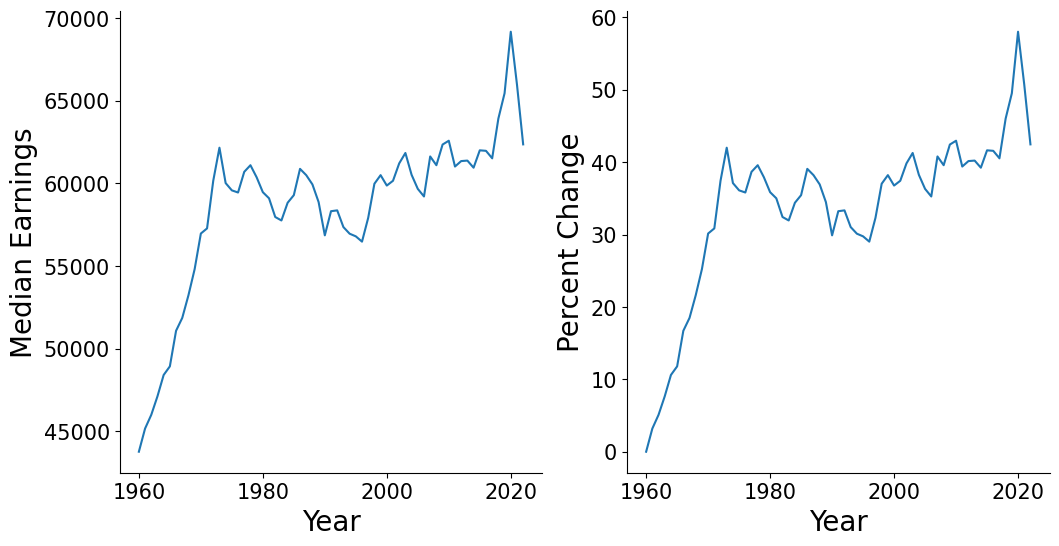

In [3]:
plt.subplot(1, 2, 1)
sns.lineplot(x="Year", y="Median earnings (FtM)", data=median_wages)
plt.ylabel("Median Earnings")

plt.subplot(1, 2, 2)
sns.lineplot(x="Year", y="Percent Change", data=median_wages);

### Household Income
Raw data pulled from [here](https://www2.census.gov/programs-surveys/demo/tables/p60/279/tableA4.xlsx)

In [4]:
percentiles = ["20", "50 (Median)", "95"]
household_income = pd.read_csv("../raw_data/household_income.txt", sep="|").drop(columns=["90th/10th", "90th/50th", "50th/10th"])

household_income = household_income[["Year"] + percentiles]
household_income = pd.melt(household_income, id_vars=["Year"], var_name="Percentile", value_name="Income")

household_income["Date"] = pd.to_datetime(household_income["Year"], format='%Y')
household_income = household_income.sort_values(by="Date").reset_index(drop=True)

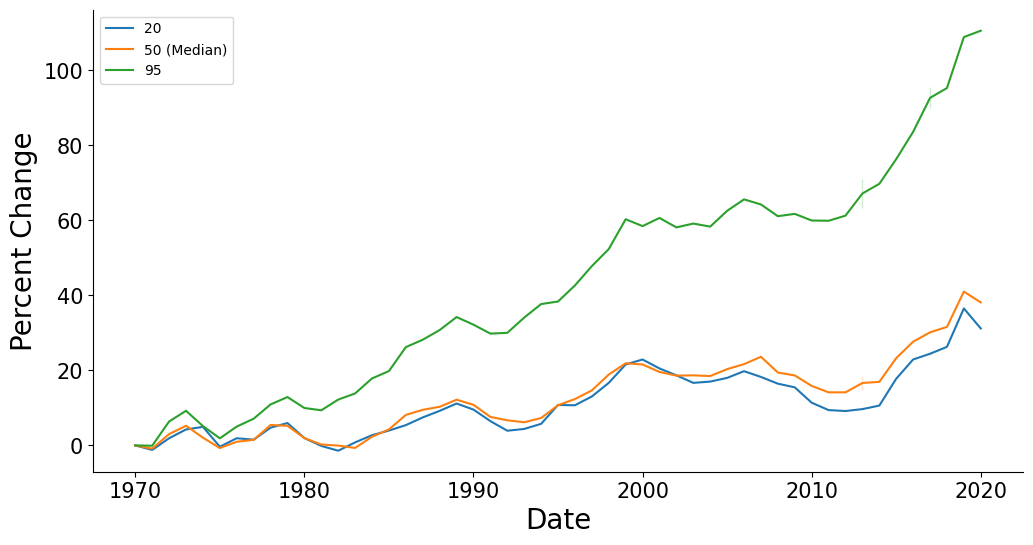

In [5]:
for percentile in percentiles:
    df = household_income[household_income.Percentile == percentile].reset_index(drop=True)
    df = helper.percent_change_relative_to(df, "1970-01-01", "Income")

    sns.lineplot(x="Date", y="Percent Change", data=df, label=percentile)

## Population

In [6]:
population = pd.read_csv("../raw_data/government/population.csv")
population = population.sort_values("Year").reset_index(drop=True)

# Regulation

## Banking
### Inflation

In [7]:
df = pd.read_csv("../raw_data/government/inflation_data.csv")
df.head()

,year,amount,inflation rate
0,1912,1.00,0.02
1,1913,1.02,0.02
2,1914,1.03,0.01
3,1915,1.04,0.01
4,1916,1.12,0.08


### Consumer Price Index (CPI)
Raw data pulled from [here](https://data.bls.gov/timeseries/CUUR0000SA0?years_option=all_years) 

In [8]:
cpi_data = pd.read_excel("../raw_data/government/cpi.xlsx", header=11).drop(columns=["HALF1", "HALF2"])
cpi_data = helper.format_year_month_table(cpi_data, "CPI")

/home/jordan/python_environments/caml/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


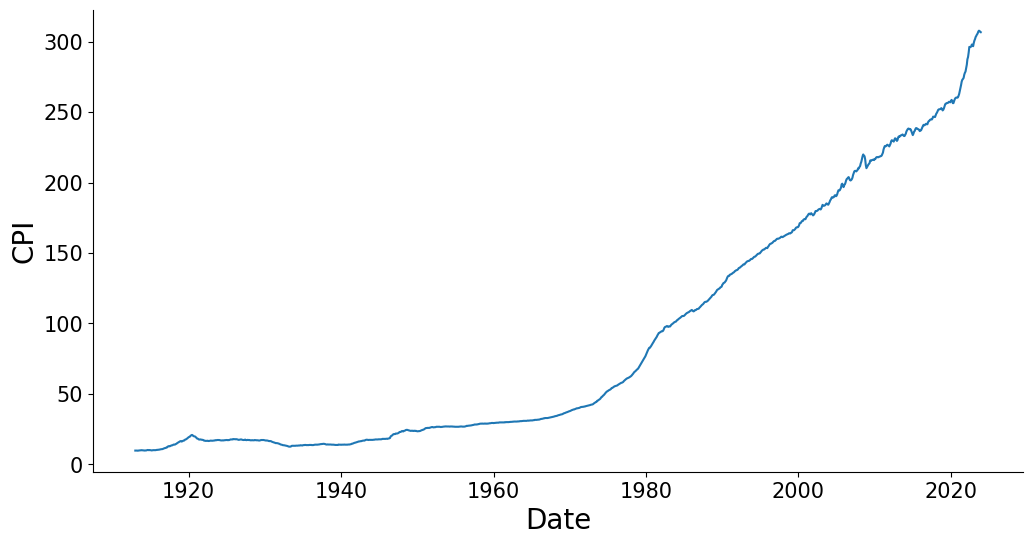

In [9]:
sns.lineplot(x="Date", y="CPI", data=cpi_data);

### Money Supply

In [10]:
df = pd.read_csv("../raw_data/government/money_supply_m2.csv")
df["Date"] = pd.to_datetime(df["Date"], format="mixed")
df.head()

,Date,Billions of Dollars
0,1959-01-01,286.6
1,1959-02-01,287.7
2,1959-03-01,289.2
3,1959-04-01,290.1
4,1959-05-01,292.2


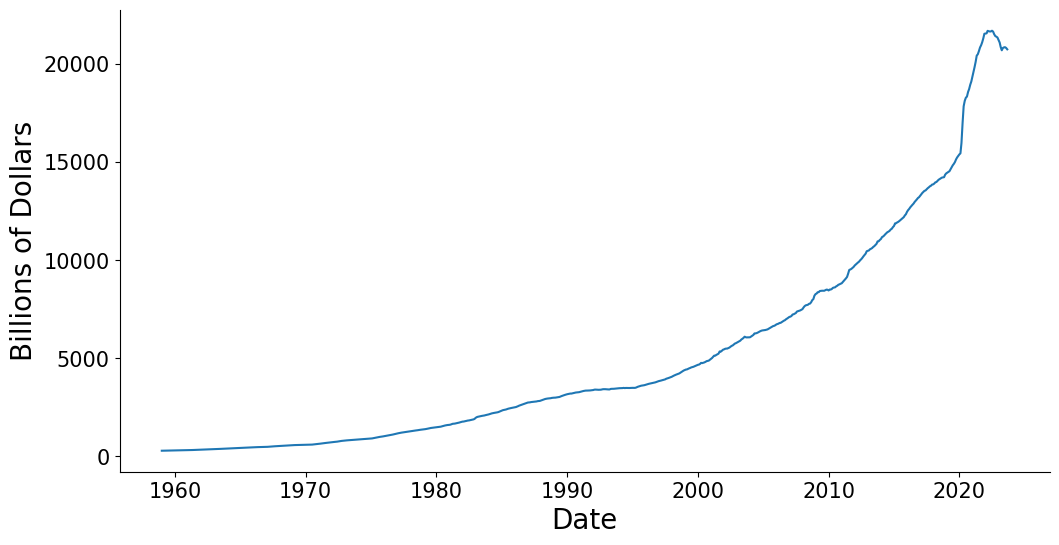

In [11]:
sns.lineplot(x="Date", y="Billions of Dollars", data=df);

## Aviation

### Airports
Data from the [Bureau of Transportation Statistics](https://www.bts.gov/content/number-us-airportsa)

In [12]:
airports = pd.read_csv("../raw_data/government/aviation/airports.txt")

Text(0, 0.5, 'Public Airports')

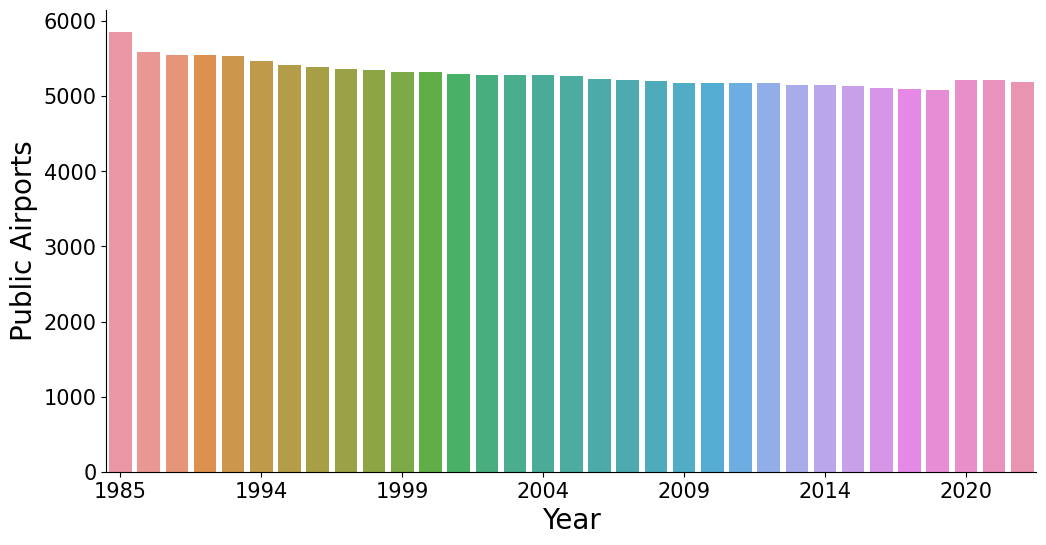

In [13]:
ax = sns.barplot(x="Year", y="Public", data=airports)

ax.set_xticks(range(0, len(airports), 5), airports.Year.values[::5])
plt.ylabel("Public Airports")

In [14]:
airports = pd.read_excel("../raw_data/government/aviation/top_200_airports.xlsx", skiprows=2)
airports.Opened = airports.Opened.fillna(0.0).astype(int)
airports = airports.replace(0, None)

In [15]:
airports[airports["2022 Rank"] <= 50].sort_values(by="Opened").tail()

,2022 Rank,Airport,2022 Enplaned Passengers,2021 Rank,2021 Enplaned Passengers,Pct. Change 2021-2022,Opened
43,44,"Kansas City, MO: Kansas City International",4.7846,42,3.7884,26.296062,1972
1,2,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",35.3294,2,30.0006,17.762311,1973
41,42,"Fort Myers, FL: Southwest Florida International",5.1254,35,5.0775,0.943378,1983
2,3,"Denver, CO: Denver International",33.7499,3,28.6285,17.889166,1995
26,27,"Austin, TX: Austin - Bergstrom International",10.3581,30,6.6568,55.601791,1999


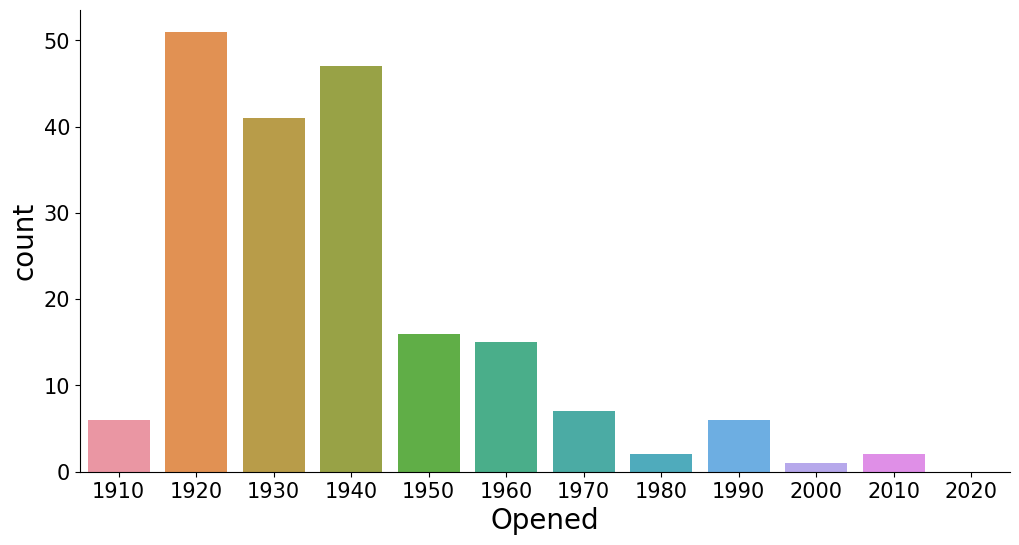

In [16]:
counts = airports["Opened"].value_counts().to_frame().reset_index().sort_values(by="Opened")
counts = counts.groupby((counts["Opened"]//10)*10).sum().drop(columns=["Opened"]).reset_index()
counts = pd.concat([counts, pd.DataFrame({"Opened": [2020], "counts": [0]})])

ax = sns.barplot(x="Opened", y="count", data=counts)
# ax.set_xticks(range(0, len(counts), 5), counts.Opened.values[::5]);

In [17]:
ax = sns.barplot(x="Year", y="Public", data=airports)

ax.set_xticks(range(0, len(airports), 5), airports.Year.values[::5])
plt.ylabel("Public Airports")

ValueError: Could not interpret input 'Year'

### Commercial Aviation Fatalities Over Time
Raw data pulled from [here](https://en.wikipedia.org/wiki/List_of_fatal_accidents_and_incidents_involving_commercial_aircraft_in_the_United_States)  
Other data available [here](https://www.bts.gov/content/us-general-aviationa-safety-data)

In [ ]:
df = pd.read_csv("../raw_data/government/aviation/List_of_fatal_accidents_and_incidents_involving_commercial_aircraft_in_the_United_States.csv", sep="\t")
df["Date"] = pd.to_datetime(df["Date"], format="mixed")
df["Fatalities"] = df["Fatalities"].replace(",", "").astype(float)

# Remove September 11th flights
df = df[df["Date"] != "2001-09-11"]
df.head()

In [ ]:
fatalities_per_decade = df["Fatalities"].groupby((df["Date"].dt.year//10)*10).sum().reset_index()
# fatalities_per_year = df["Fatalities"].groupby(df["Date"].dt.year).sum().reset_index()
plt.title("United States Commericial Airline Fatalities")
sns.barplot(x="Date", y="Fatalities", data=fatalities_per_decade);

### Commercial Airplane Speeds Over Time
Data was manually collected

In [ ]:
df = pd.read_csv("../raw_data/government/aviation/commercial_airplane_speeds.txt")
df.head()

In [ ]:
axes = sns.lineplot(x="Year", y="Cruise Speed", data=df)

for _, row in df.iterrows():
    axes.text(row.Year, row["Cruise Speed"], row.Plane)

### Prices
Raw data pulled from [here](https://data.bls.gov/timeseries/CUUR0000SETG01?output_view=data)

In [ ]:
airline_fares = pd.read_excel("../raw_data/government/aviation/airline_fares.xlsx", header=11).drop(columns=["HALF1", "HALF2"])
airline_fares = helper.format_year_month_table(airline_fares)

In [ ]:
cpi_relative_to_1970 = helper.percent_change_relative_to(cpi_data, date="1970-01-01", column_name="CPI")
airline_fares_relative_to_1970 = helper.percent_change_relative_to(airline_fares, date="1970-01-01", column_name="Value")

In [ ]:
sns.lineplot(x="Date", y="Percent Change", data=airline_fares_relative_to_1970, label="Airline fares")
sns.lineplot(x="Date", y="Percent Change", data=cpi_relative_to_1970, label="CPI");

### General Aviation Planes
Raw data pulled from [here](https://gama.aero/facts-and-statistics/statistical-databook-and-industry-outlook/annual-data/)

In [ ]:
general_aviation_plane_shipments = pd.read_csv("../raw_data/government/aviation/general_aviation_plane_shipments.txt", sep="\t")
general_aviation_plane_shipments["Grand Total"] = general_aviation_plane_shipments["Grand Total"].str.replace(' ', '').str.replace(",", "").astype(int)

In [ ]:
sns.lineplot(x="Year", y="Grand Total", data=general_aviation_plane_shipments);

## Construction

### Building Cost Index
Raw data pulled from [here](https://www.enr.com/economics/historical_indices/building_cost_index_history)

In [ ]:
building_cost_index_annual_average = pd.read_csv("../raw_data/government/construction/building_cost_index_annual_average.txt")
building_cost_index_annual_average["Date"] = pd.to_datetime(building_cost_index_annual_average["Year"], format='%Y')

In [ ]:
building_cost_index = pd.read_csv("../raw_data/government/construction/building_cost_index.txt").drop(columns=["AVG"])
building_cost_index = helper.format_year_month_table(building_cost_index, "BCI")

building_cost_index = pd.concat([building_cost_index, building_cost_index_annual_average])
building_cost_index = building_cost_index.sort_values(by="Date").reset_index(drop=True)

In [ ]:
cpi_relative_to_1960 = helper.percent_change_relative_to(cpi_data, date="1960-01-01", column_name="CPI")
building_cost_index_relative_to_1960 = helper.percent_change_relative_to(building_cost_index, date="1960-01-01", column_name="BCI")

In [ ]:
sns.lineplot(x="Date", y="Percent Change", data=building_cost_index_relative_to_1960, label="BCI")
sns.lineplot(x="Date", y="Percent Change", data=cpi_relative_to_1960, label="CPI");

## Education

### Public school employement
Raw data pulled from [here](https://nces.ed.gov/programs/digest/d22/tables/dt22_213.10.asp)

In [ ]:
public_school_employment = pd.read_csv("../raw_data/government/education/public_school_employment.txt")

In [ ]:
public_school_employment["Students"] = public_school_employment["Teachers"] * public_school_employment["Teachers per student"]

In [ ]:
for column_name in ["Officials and administrators", "Principals and assistant principals", "Teachers", "Students", "Support staff"]:
    data = helper.percent_change_relative_to(public_school_employment, 2000, column_name)
    
    sns.lineplot(x="Year", y="Percent Change", data=data, label=column_name)

### Educational Attainment
Raw data pulled from [here](https://nces.ed.gov/programs/digest/d22/tables/xls/tabn104.20.xls)

In [ ]:
educational_attainment = pd.read_csv("../raw_data/government/education/educational_attainment.txt")

educational_attainment["Date"] = pd.to_datetime(educational_attainment["Year"], format='%Y')
educational_attainment = educational_attainment.sort_values(by="Date").reset_index(drop=True)

In [ ]:
# Bachelors degrees relative to 1970
bachelors_degree = educational_attainment[educational_attainment["Degree"] == "Bachelor's degree"]
bachelors_degree_relative_to_1970 = helper.percent_change_relative_to(bachelors_degree.reset_index(drop=True), "1970-01-01", "Percent")

In [ ]:
plt.subplot(1, 3, 1)
sns.lineplot(x="Year", y="Percent", data=educational_attainment, hue="Degree")

plt.subplot(1, 3, 2)
sns.lineplot(x="Year", y="Percent", data=bachelors_degree_relative_to_1970)

plt.subplot(1, 3, 3)
sns.lineplot(x="Year", y="Percent Change", data=bachelors_degree_relative_to_1970);

### College Tuition
Raw data pulled from [here](https://data.bls.gov/timeseries/CUUR0000SEEB01?output_view=data)

In [ ]:
college_tuition = pd.read_excel("../raw_data/government/education/college_tuition_and_fees.xlsx", header=11).drop(columns=["HALF1", "HALF2"])
college_tuition = helper.format_year_month_table(college_tuition)

In [ ]:
# Compute CPI relative to 1978 to match tuition data
cpi_relative_to_1978 = helper.percent_change_relative_to(cpi_data, date="1978-01-01", column_name="CPI")
college_tuition_relative_to_1978 = helper.percent_change_relative_to(college_tuition, date="1978-01-01", column_name="Value")

In [ ]:
sns.lineplot(x="Date", y="Percent Change", data=college_tuition_relative_to_1978, label="College Tuition")
sns.lineplot(x="Date", y="Percent Change", data=cpi_relative_to_1978, label="CPI");

### Enrollment
Raw data pulled from [here](https://educationdata.org/college-enrollment-statistics)

In [ ]:
college_enrollment = pd.read_csv("../raw_data/government/education/college_enrollment.txt")

college_enrollment["Year"] = pd.to_datetime(college_enrollment["Year"], format='%Y')
college_enrollment = college_enrollment.sort_values(by="Year").reset_index(drop=True)
helper.percent_change_relative_to(college_enrollment, "1970-01-01", "Total Enrollment").tail()

In [ ]:
plt.subplot(1, 2, 1)
sns.lineplot(x="Year", y="Total Enrollment", data=college_enrollment)

plt.subplot(1, 2, 2)
college_enrollment = helper.percent_change_relative_to(college_enrollment, "1974-01-01", "Total Enrollment")
sns.lineplot(x="Year", y="Percent Change", data=college_enrollment);

### Secondary Institutions
Raw data pulled from here [here](https://nces.ed.gov/programs/digest/d22/tables/dt22_317.10.asp)

In [ ]:
secondary_institutions = pd.read_excel("../raw_data/government/education/post_secondary_institutions.xlsx", header=3)

secondary_institutions["Year"] = secondary_institutions["Year"].apply(lambda x: x.split("-")[0])
secondary_institutions["Date"] = pd.to_datetime(secondary_institutions["Year"], format='%Y')
secondary_institutions = secondary_institutions.sort_values(by="Date").reset_index(drop=True)

In [ ]:
secondary_institutions = helper.percent_change_relative_to(secondary_institutions, "1974-01-01", "Total")

plt.subplot(1, 2, 1)
sns.lineplot(x="Date", y="Total", data=secondary_institutions)

plt.subplot(1, 2, 2)
sns.lineplot(x="Date", y="Percent Change", data=secondary_institutions);

## Energy

### Energy Consumption
Raw data pulled from [here](https://www.eia.gov/energyexplained/us-energy-facts/) and [here](https://www.eia.gov/totalenergy/data/monthly/xls/Table_D1.xlsx)

In [ ]:
estimated_energy_consumption = pd.read_csv("../raw_data/government/energy/estimated_energy_consumption.csv")

energy_consumption = pd.read_csv("../raw_data/government/energy/primary-consumption-by-major-source.csv")
ENERGY_TYPES = ["Coal", "Natural gas", "Petroleum", "Nuclear", "Renewables"]
energy_consumption["Total"] = energy_consumption[ENERGY_TYPES].sum(axis=1)

energy_consumption = pd.concat([estimated_energy_consumption, energy_consumption])
energy_consumption = pd.melt(energy_consumption, id_vars=["Year"], var_name="Type", value_name="Quads")
energy_consumption = energy_consumption.loc[energy_consumption["Type"].isin(ENERGY_TYPES)]

total_consumption = energy_consumption.drop(columns=["Type"]).groupby("Year").sum().reset_index()

In [ ]:
plt.subplot(1, 2, 1)
sns.lineplot(x="Year", y="Quads", data=energy_consumption, hue="Type")

plt.subplot(1, 2, 2)
sns.lineplot(x="Year", y="Quads", data=total_consumption)

### Energy Consumption Per Capita

In [ ]:
for index, row in total_consumption.iterrows():
    population_index = np.argmin(np.abs(population.Year.values - row.Year))
    total_consumption.at[index, "Per Capita"] = row.Quads / population.iloc[population_index].Population

In [ ]:
sns.lineplot(x="Year", y="Per Capita", data=total_consumption)

### Nuclear reactor cost
Data provided from authors

In [ ]:
reactors = pd.read_excel("../raw_data/government/energy/Lovering2016_OCC_Nuclear_Seven_Countries.xlsx", header=0)
reactors = reactors[reactors.Country == "US"].reset_index(drop=True)
reactors["Duration"] = reactors.Comm_Op_Year - reactors.Constr_Year

In [ ]:
fig = plt.figure()
ax = fig.gca()
ax.set_yticks(np.arange(2, 25))
plt.grid()
sns.scatterplot(x="Constr_Year", y="Duration", data=reactors)

In [ ]:
reactors_after_tmi = reactors[reactors.Note == "Completed after TMI"]
point_size = pd.cut(reactors_after_tmi.Capacity_MW, bins=[0, 1, 500, 1000, 1500], labels=[1, 20, 50, 70]).values
sns.scatterplot(x="Duration", y="OCC", data=reactors_after_tmi, marker="s", s=point_size)

reactors_before_tmi = reactors[reactors.Note != "Completed after TMI"]
point_size = pd.cut(reactors_before_tmi.Capacity_MW, bins=[0, 1, 500, 1000, 1500], labels=[1, 20, 50, 70]).values
sns.scatterplot(x="Duration", y="OCC", data=reactors_before_tmi, s=point_size)

## Medical

Approvals data from [here](https://www.fda.gov/about-fda/histories-fda-regulated-products/summary-nda-approvals-receipts-1938-present)

Orphan data from [here](https://www.fda.gov/news-events/fda-voices/cder-continues-make-rare-diseases-priority-drug-approvals-and-programming-speed-therapeutic) and [here](https://www.raps.org/News-and-Articles/News-Articles/2020/1/FDA-2019-Continues-Uptick-in-Orphan-Drug-Approval)

[R&D Spending per year](https://www.cbo.gov/system/files/2021-04/57025-Data.xlsx)

In [ ]:
fda_approvals = pd.read_csv("../raw_data/government/medical/fda_applications.txt").iloc[20:]
fda_approvals["Percent Orphans"] = fda_approvals["Orphans"] / fda_approvals["New Molecular Entities"]

In [ ]:
plt.subplot(1, 2, 1)
sns.barplot(x="Year", y="New Molecular Entities", data=fda_approvals)

plt.subplot(1, 2, 2)
sns.lineplot(x="Year", y="Percent Orphans", data=fda_approvals)

## Railroads
### Passenger Train Spees

In [ ]:
df = pd.read_csv("../raw_data/government/transportation/passenger_train_speeds.txt")
df["Date"] = pd.to_datetime(df["Date"], format="mixed")
df.head()

In [ ]:
axes = sns.lineplot(x="Date", y="MPH", data=df, hue="Country")

## All
- [Television](https://beta.bls.gov/dataViewer/view/timeseries/CUUR0000SERA01)
- [Airline fares](https://beta.bls.gov/dataViewer/view/timeseries/CUSR0000SETG01)
- [Hospital services](https://beta.bls.gov/dataViewer/view/timeseries/CUUR0000SEMD01)
- [Transportation services](https://beta.bls.gov/dataViewer/view/timeseries/CUSR0000SAS4)
- [Energy](https://beta.bls.gov/dataViewer/view/timeseries/CUSR0000SA0E)
- [Cellphone services](https://beta.bls.gov/dataViewer/view/timeseries/CUUR0000SEED03)
- [Shelter](https://beta.bls.gov/dataViewer/view/timeseries/CUUR0000SAH1)
- [New cars](https://beta.bls.gov/dataViewer/view/timeseries/CUSR0000SS45011)
- [Computers](https://beta.bls.gov/dataViewer/view/timeseries/CUUR0000SEEE01)
- [Computer software](https://beta.bls.gov/dataViewer/view/timeseries/CUUR0000SEEE02)
- [Medical care](https://beta.bls.gov/dataViewer/view/timeseries/CUUR0000SAM)

In [ ]:
sectors = [
    ["cellphone_services"],
    ["television"],
    ["energy", "energy"],
    ["medical", "hospital_services"],
    ["aviation", "airline_fares"],
    ["shelter"],
    ["food"],
    ["computer_software"],
    ["new_cars"],
    ["computers"],
    ["medical", "medical_care"],
    ["education", "college_tuition"],
]

In [ ]:
df = pd.DataFrame()

for description in sectors:
    path = os.path.join(*description)
    data = pd.read_csv(f"../raw_data/government/{path}.csv")
    data["Label"] = data["Label"].replace({"Half1": "Jan", "Half2": "Jul"}, regex=True)
    
    data["Date"] = pd.to_datetime(data['Label'], format='%Y %b')
    data["Category"] = description[-1]
    data = helper.percent_change_relative_to(data, "2000-01-01", "Value")
    df = pd.concat([df, data])

In [ ]:
data = building_cost_index.rename(columns={"BCI": "Value"}).dropna().reset_index(drop=True)
data["Category"] = "Building"
building_cost_index_relative_to_2000 = helper.percent_change_relative_to(data, date="2000-01-01", column_name="Value")
df = pd.concat([df, building_cost_index_relative_to_2000])

In [ ]:
cpi_relative_to_2000 = helper.percent_change_relative_to(cpi_data, "2000-01-01", "CPI")

In [ ]:
offsets = {
    "energy": 5,
    "building": -2,
    "medical_care": 2,
    "food": -5,
    "television": -8,
    "shelter": -2,
    "airline_fares": -5,
}

In [ ]:
sorted_categories = df[df["Date"] == "2023-12-01"].sort_values(by="Percent Change").Category.unique().tolist()
color_palette = sns.color_palette("coolwarm", len(sorted_categories))

In [ ]:
average_by_year = df[["Year", "Percent Change", "Category"]].groupby(["Category", "Year"]).mean().reset_index()

plt.figure(figsize=(8, 8))
# sns.lineplot(x="Date", y="Percent Change", data=df, hue="Category")
plt.axhline(y=cpi_relative_to_2000["Percent Change"].values[-1], ls="--")
plt.legend([],[], frameon=False)

for category_name in df.Category.unique():
    category = df[df.Category == category_name]
    last_y = category["Percent Change"].values[-1]

    color = color_palette[sorted_categories.index(category_name)]
    sns.lineplot(x="Date", y="Percent Change", data=category, color=color)

    offset = offsets.get(category_name, 0)

    ax = plt.gca()
    xticks = ax.get_xticks()
    
    category_name = category_name.replace("_", " ").title()
    plt.text(xticks[-2] + 100, last_y + offset, category_name, fontsize=15)

## Total Pages in Federal Regulations
Raw data pulled from [here](https://regulatorystudies.columbian.gwu.edu/sites/g/files/zaxdzs4751/files/2022-11/totalpagescodefedreg_11-01-2022.csv)